In [48]:
import os
import random
from scipy import spatial
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline
from PIL import Image
#3361344.jpg

from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)


os.chdir('/Users/bozhinvi/dropbox/my_python_scripts/Part_2')
image_path = '/Users/bozhinvi/dropbox/my_python_scripts/Part_2/images'


def preprocess_batch(image_path):

    img = image.load_img(image_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    return x

In [42]:
files = os.listdir(image_path)

In [45]:
image_features = model.predict(preprocess_batch(os.path.join(image_path, files[0])))
files.pop(0)
for file in files:
    image_features = np.concatenate((image_features, model.predict(preprocess_batch(os.path.join(image_path, file)))))
files = os.listdir(image_path)

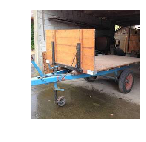

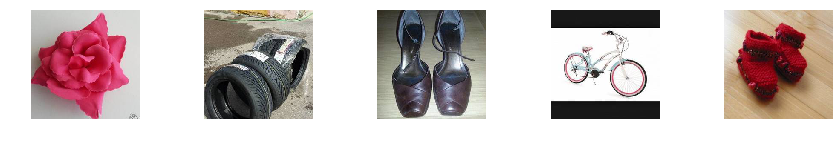

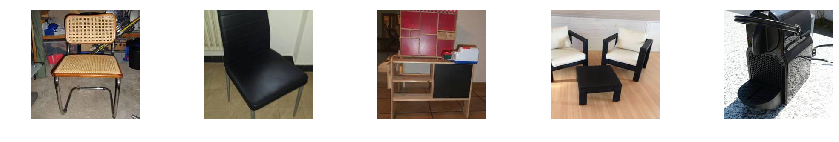

In [60]:
#files = random.sample(os.listdir(image_path),100)
# get index [i for i, elem in enumerate(files) if '361344.jpg' in elem]

cosine_similarity = [1.0 - spatial.distance.cosine(image_features[9,],image_features[i,]) for i in range(len(files))]
cosine_indexes = np.argsort(cosine_similarity)

f, axes = plt.subplots(1, 1, figsize=(2,2))
axes.imshow((Image.open(os.path.join(image_path,files[7]))))
axes.axis('off')

sim_files = [files[i] for i in cosine_indexes]

bottom5 = sim_files[0:5]

top5 = sim_files[-5:]


f, axes = plt.subplots(1, 5, figsize=(15,2))


for j in reversed(range(5)):
    axes[4 - j].imshow(Image.open(os.path.join(image_path,bottom5[j])))
    axes[4 - j].axis('off')

f, axes = plt.subplots(1, 5, figsize=(15,2))

for j in reversed(range(5)):
    axes[4 - j].imshow(Image.open(os.path.join(image_path,top5[j])))
    axes[4 - j].axis('off')
